In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from collections import Counter 
#from catboost import CatBoostClassifier


import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('application_data.csv')
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data['OCCUPATION_TYPE'] = data['OCCUPATION_TYPE'].fillna('No Value')

In [5]:
data['NAME_TYPE_SUITE'] = data['NAME_TYPE_SUITE'].fillna(data['NAME_TYPE_SUITE'].mode())

In [6]:
list_contact = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL']
list_region =  ['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION']
list_city = ['REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']
list_docs = ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
list_rate = ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']
list_other = ['TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED','DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START']

In [7]:
print(len(list_contact), len(list_region), len(list_city), len(list_docs), len(list_rate), len(list_other))

6 3 3 20 2 6


<Figure size 640x480 with 0 Axes>

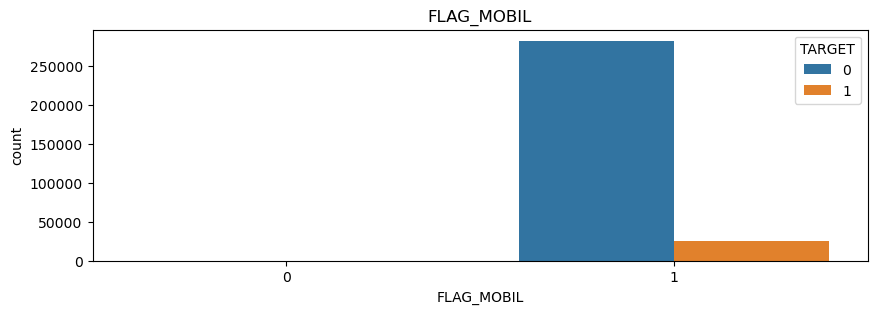

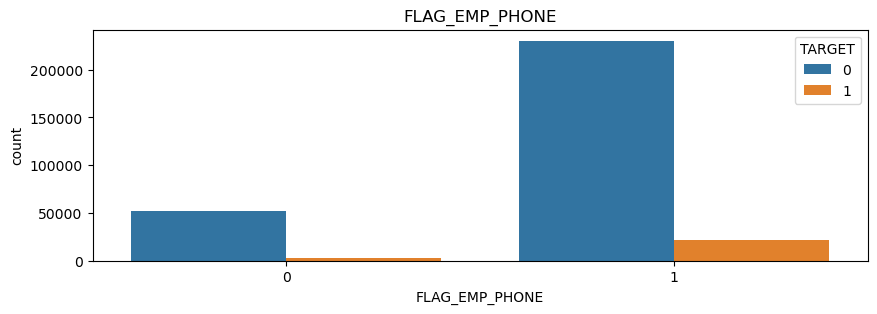

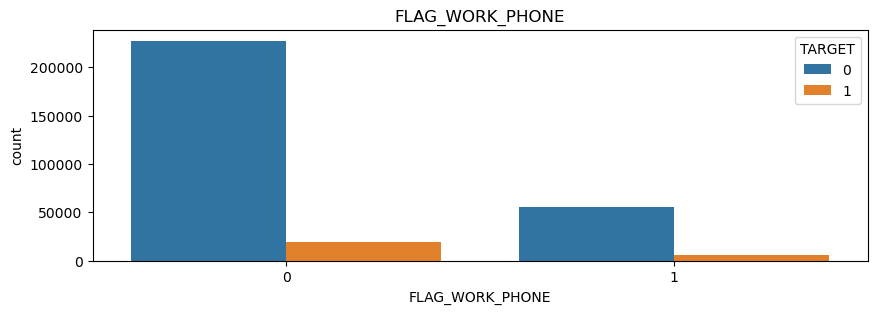

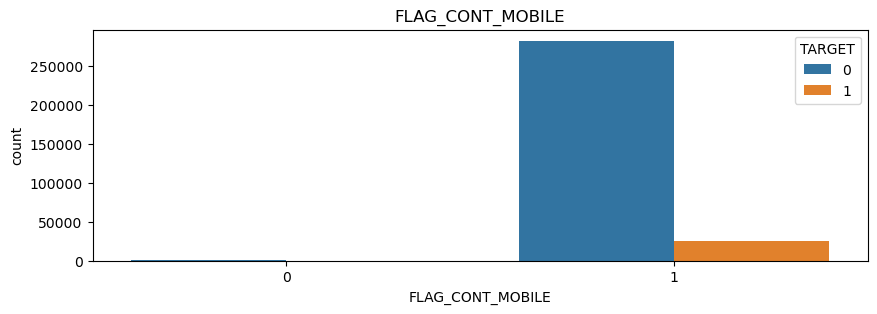

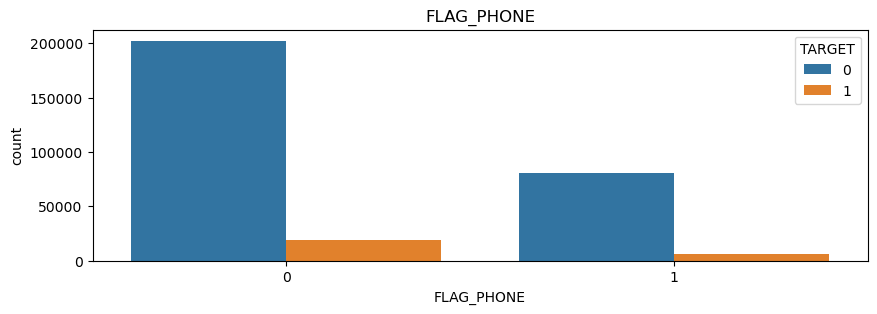

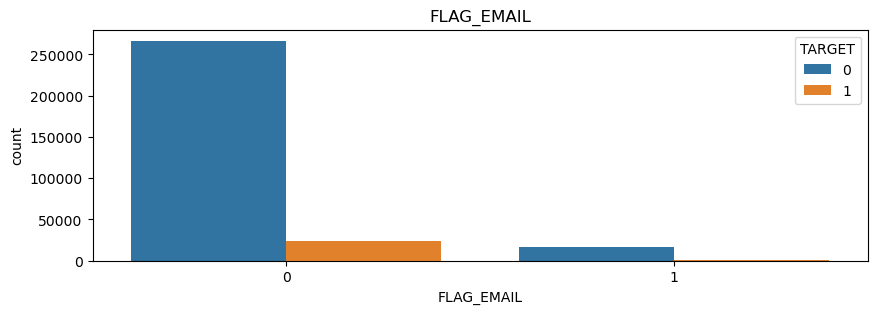

In [190]:
for i in list_contact:  
    plt.savefig('contacts.jpg')
    plt.subplots(figsize=(10, 3))
    plt.xticks(rotation = 'horizontal')
    plt.title(f'{i}')
    sns.countplot(x=i, hue= 'TARGET', data = data)

<Axes: >

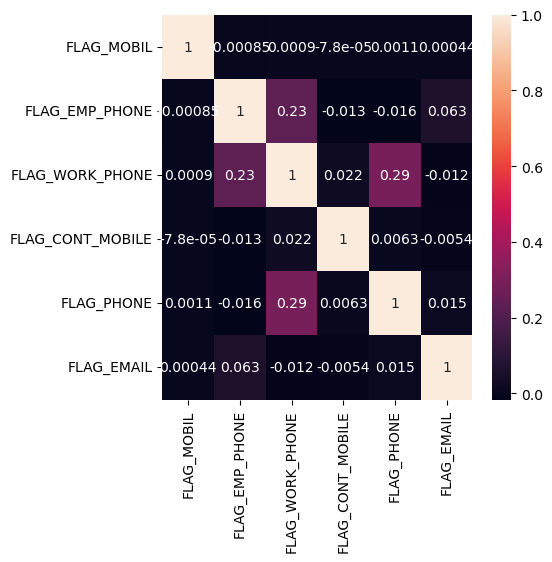

In [9]:
corr = data[list_contact].corr()
fig1, ax1 = plt.subplots(figsize=(5, 5))
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            ax = ax1,annot=True)

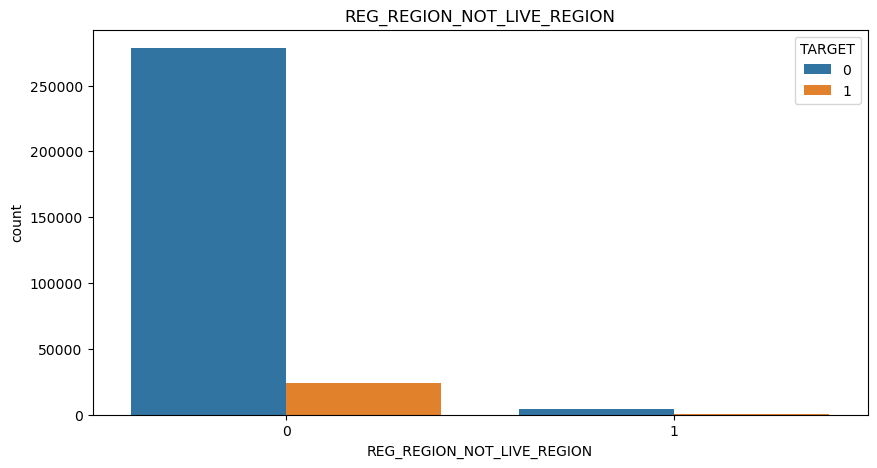

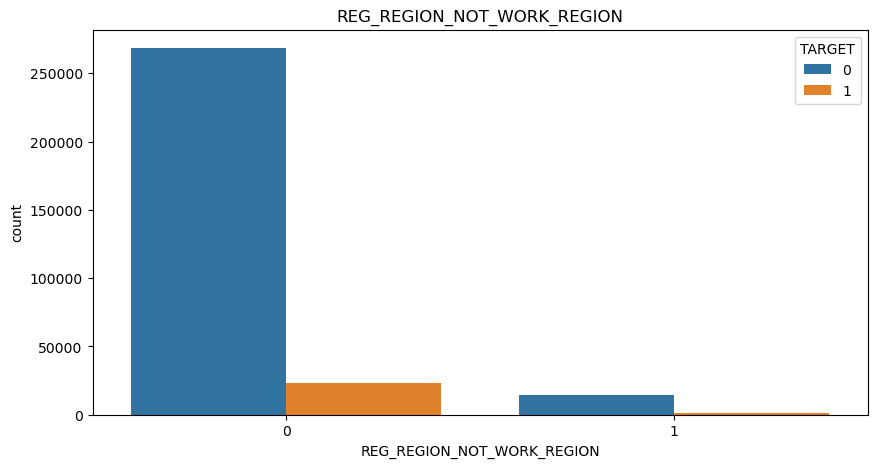

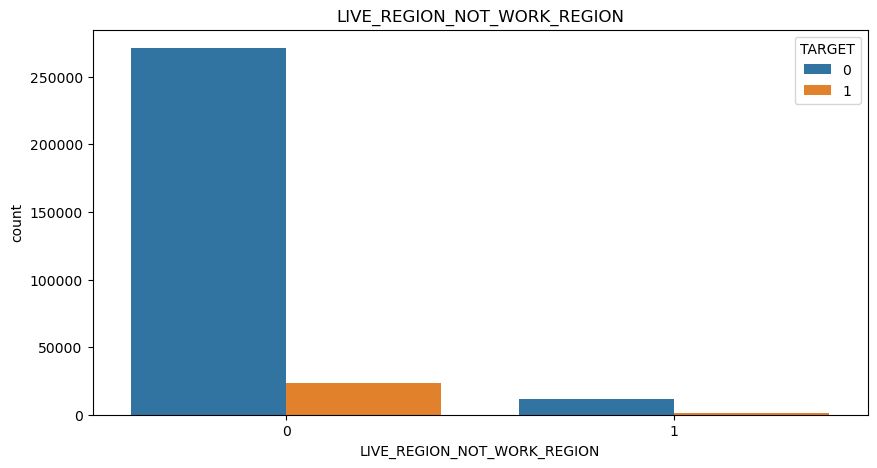

In [10]:
for i in list_region:    
    plt.subplots(figsize=(10, 5))
    plt.xticks(rotation = 'horizontal')
    plt.title(f'{i}')
    sns.countplot(x=i, hue= 'TARGET', data = data)

<Axes: >

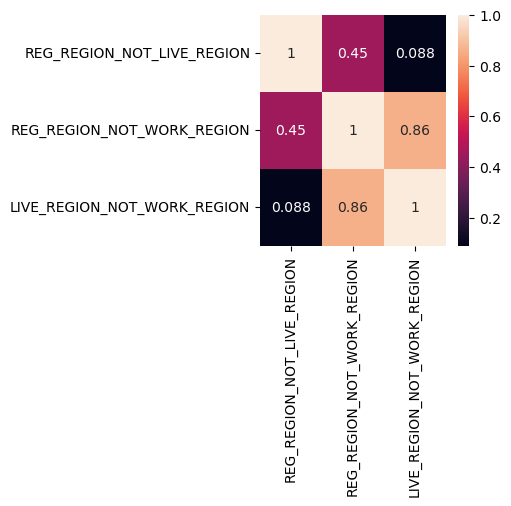

In [11]:
corr = data[list_region].corr()
fig1, ax1 = plt.subplots(figsize=(3, 3))
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            ax = ax1,annot=True)

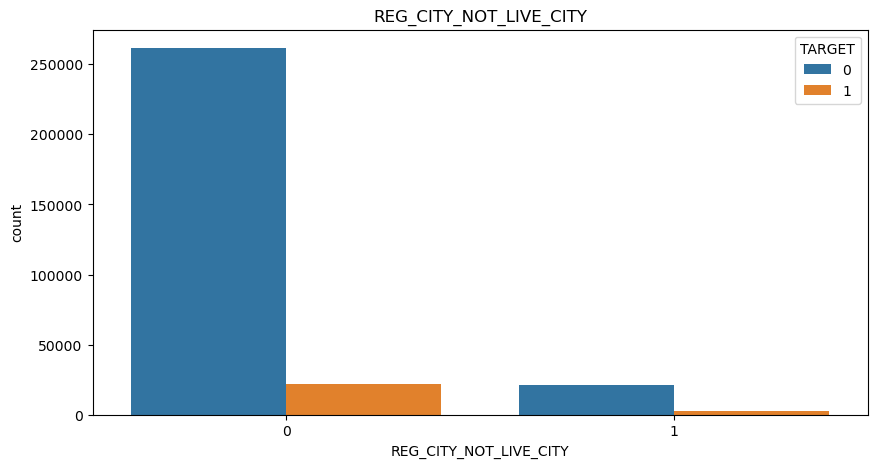

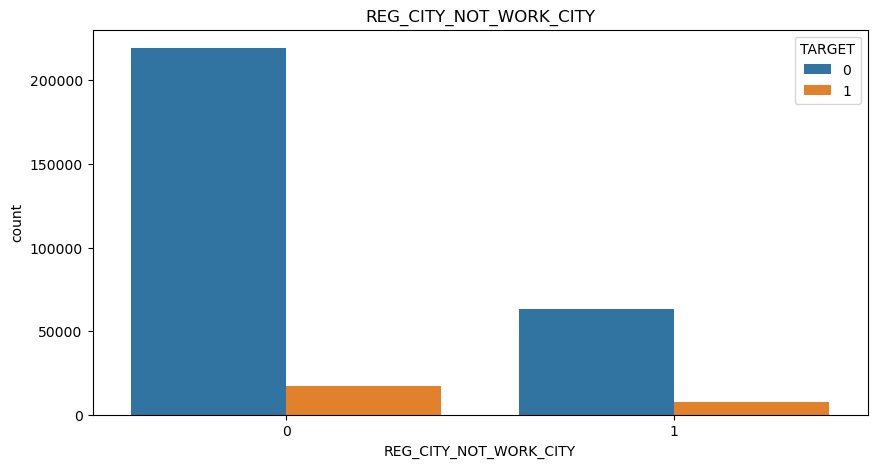

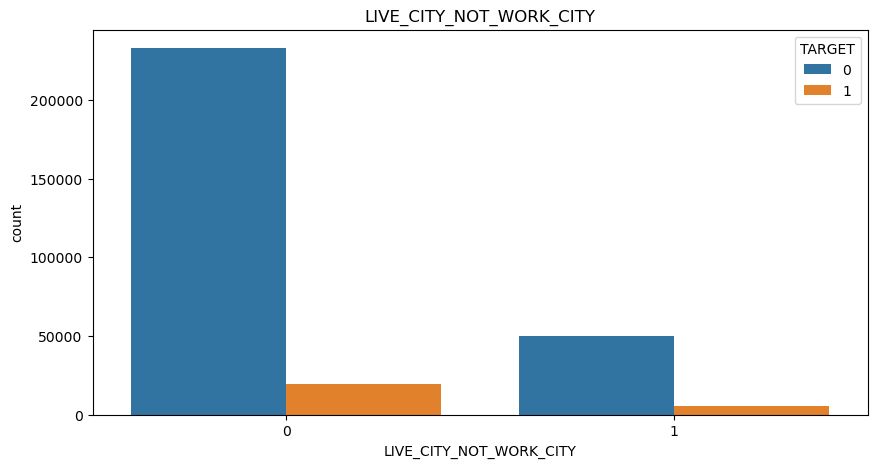

In [12]:
for i in list_city:    
    plt.subplots(figsize=(10, 5))
    plt.xticks(rotation = 'horizontal')
    plt.title(f'{i}')
    sns.countplot(x=i, hue= 'TARGET', data = data)

<Axes: >

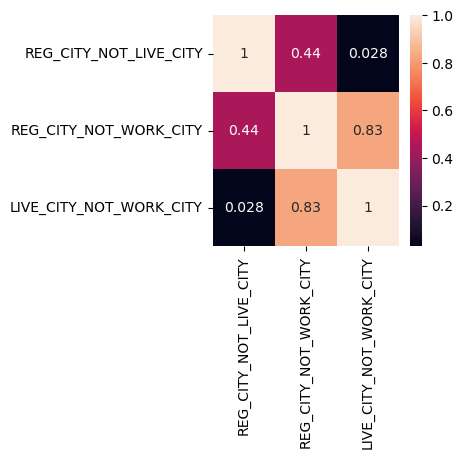

In [13]:
corr = data[list_city].corr()
fig1, ax1 = plt.subplots(figsize=(3, 3))
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            ax = ax1,annot=True)

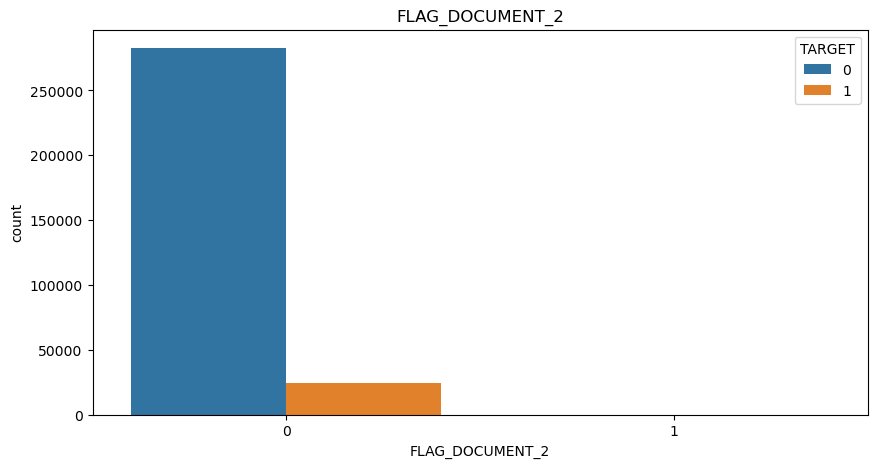

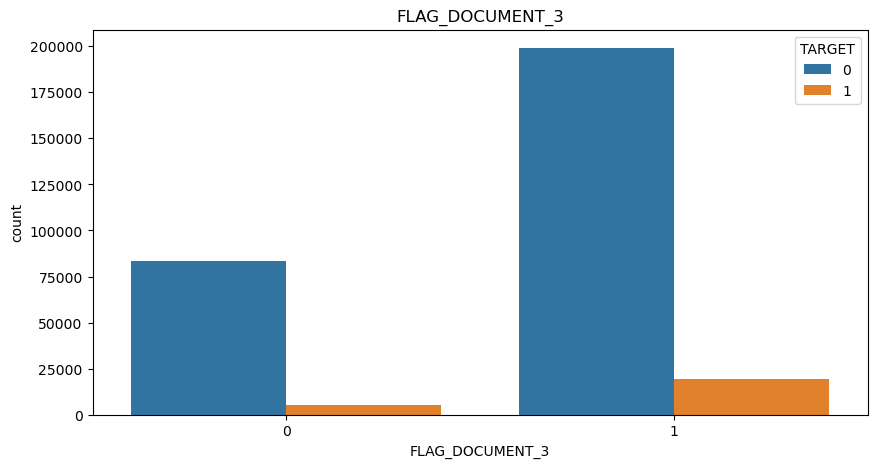

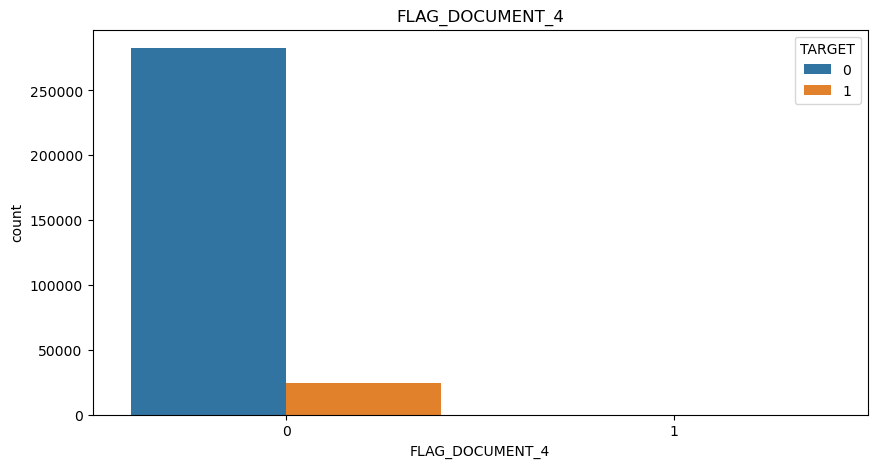

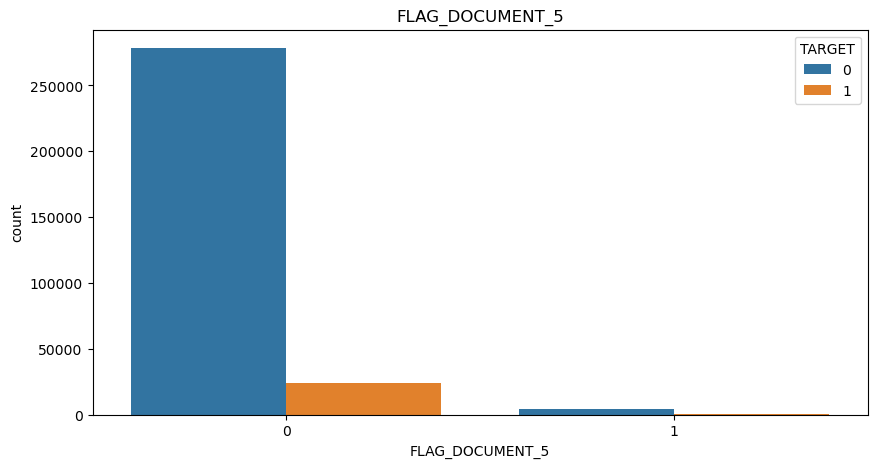

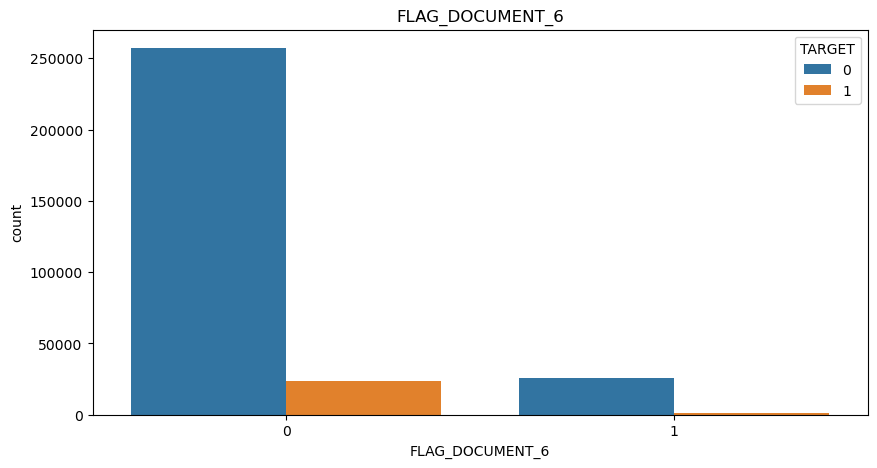

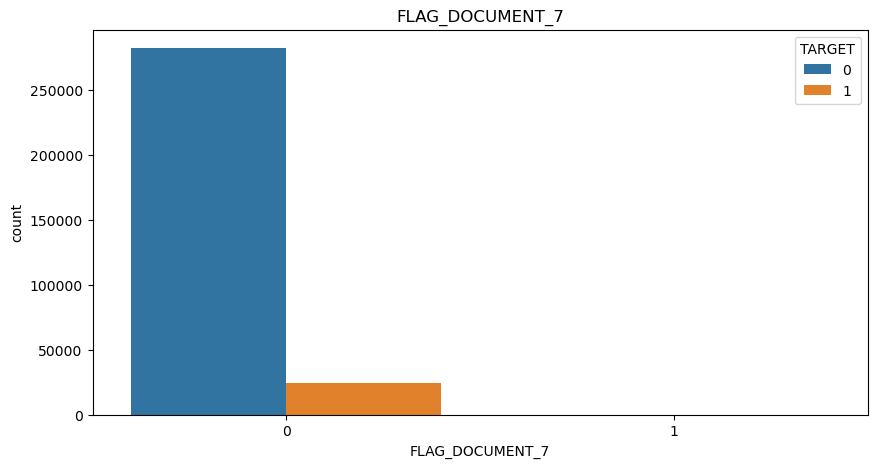

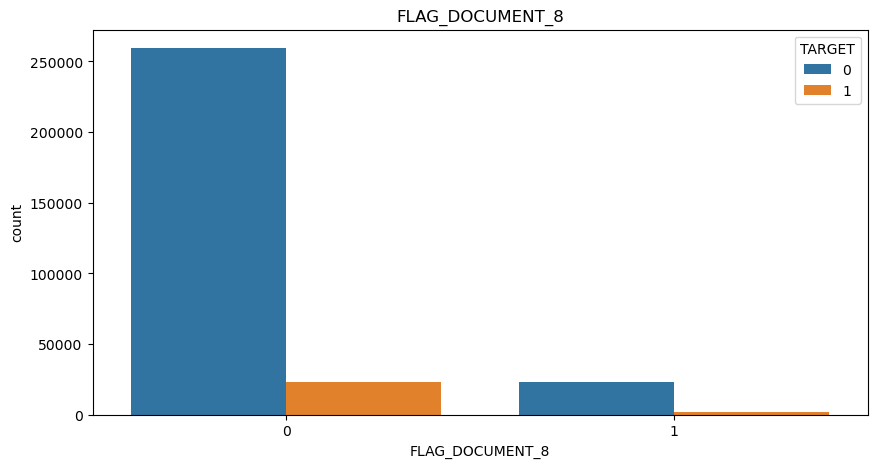

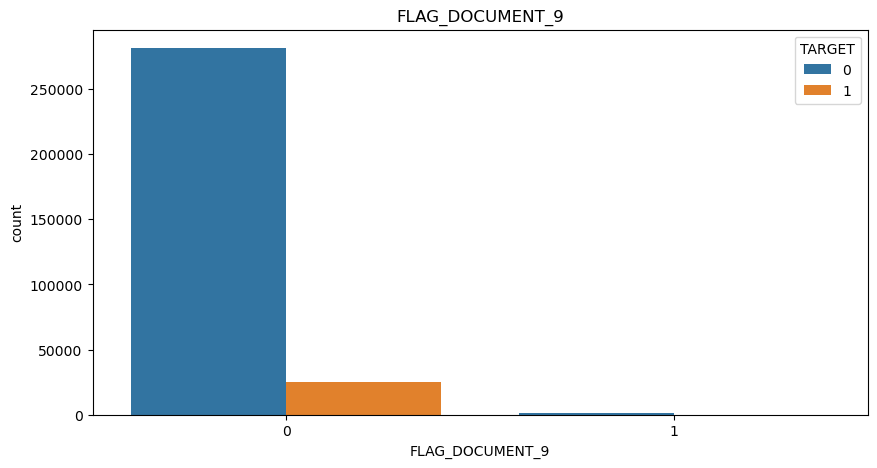

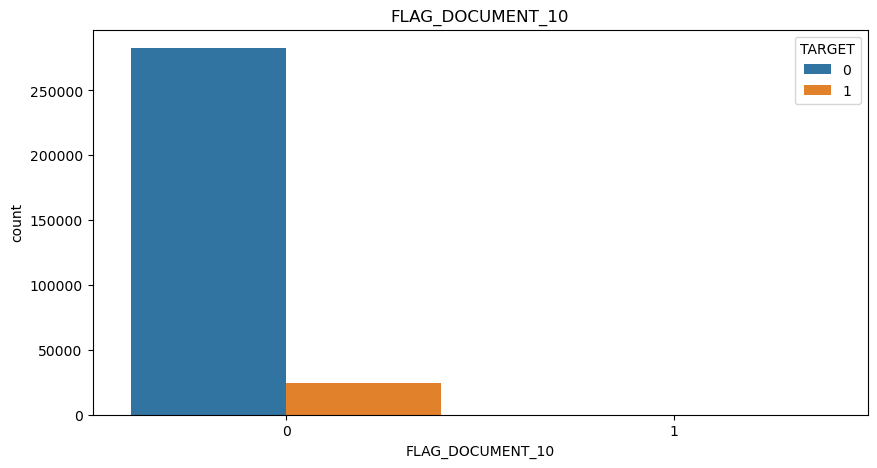

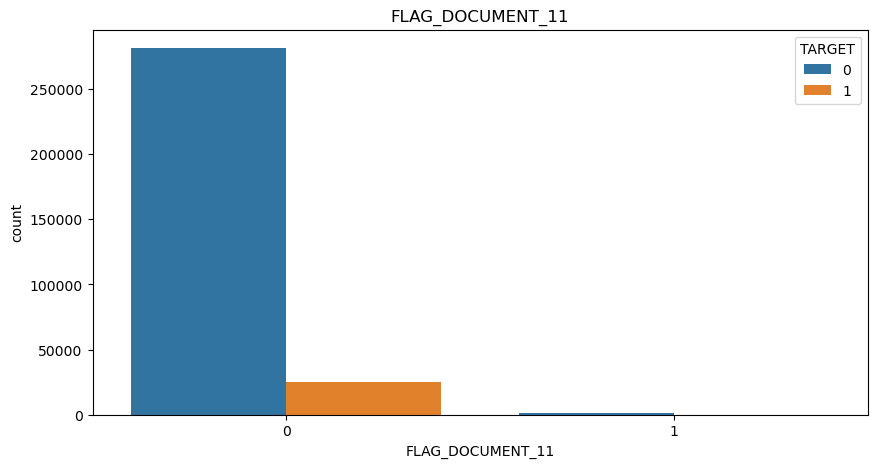

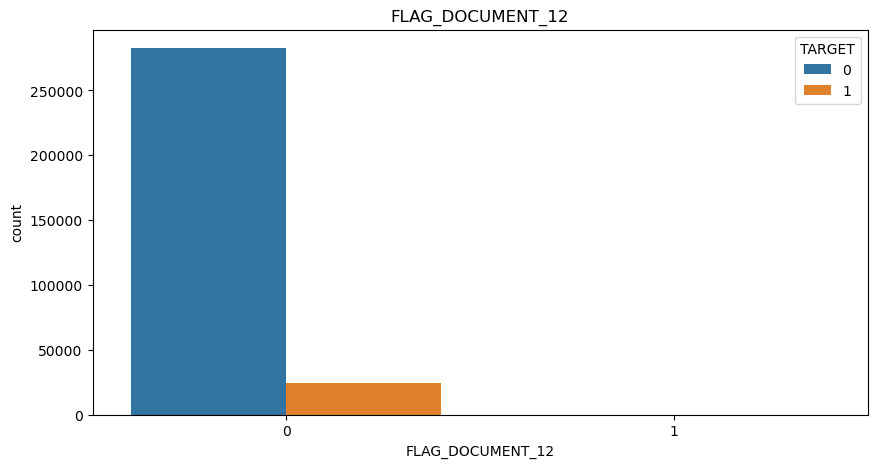

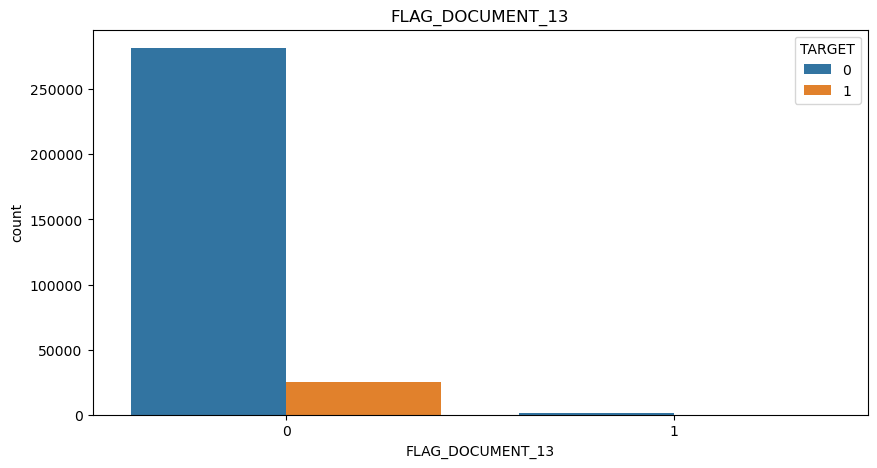

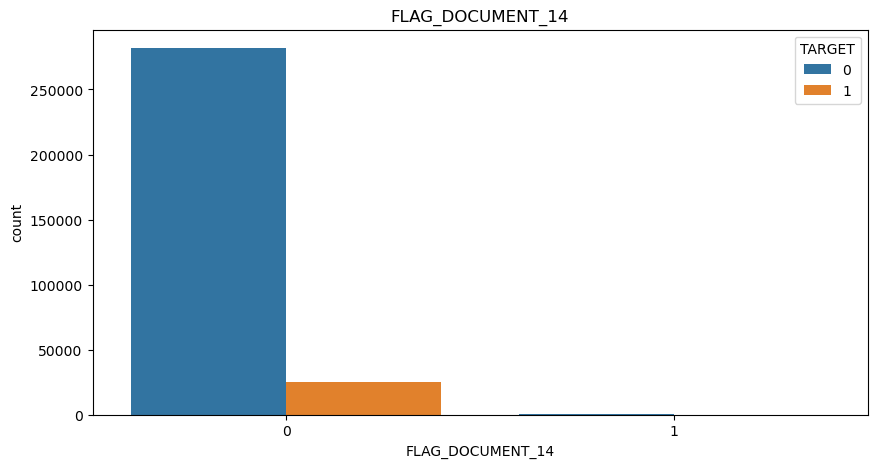

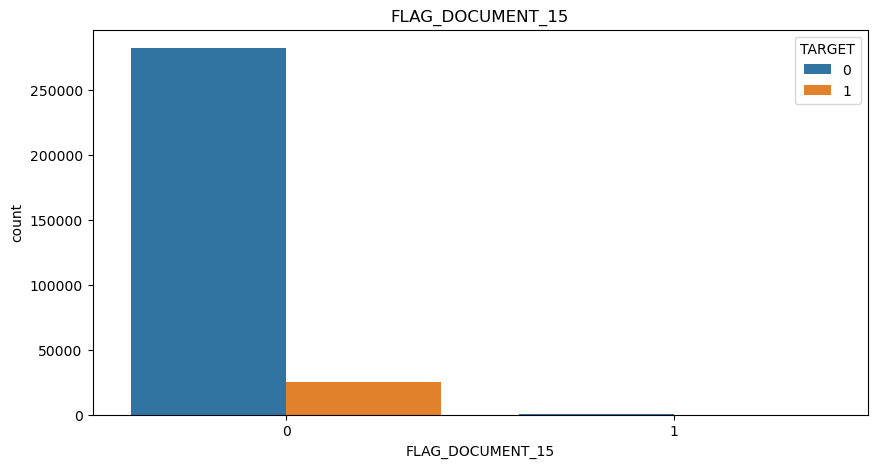

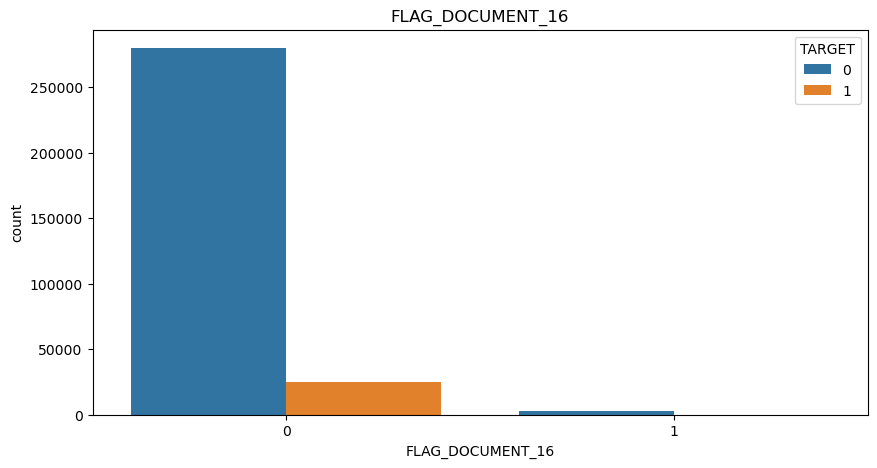

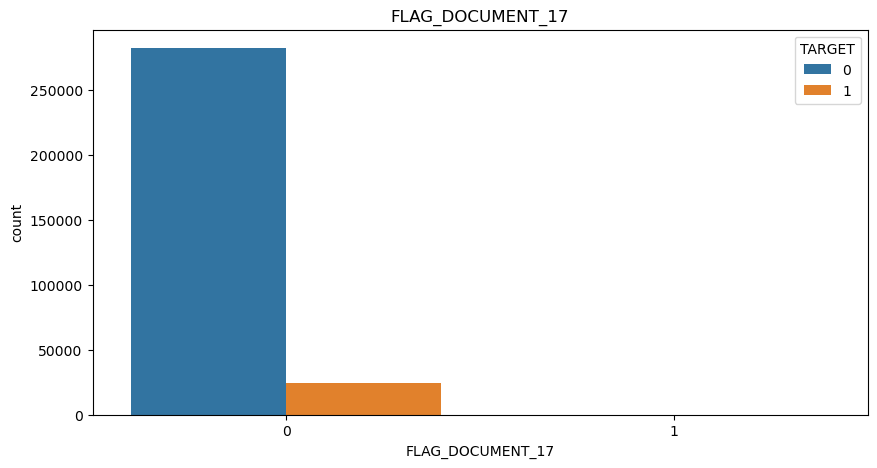

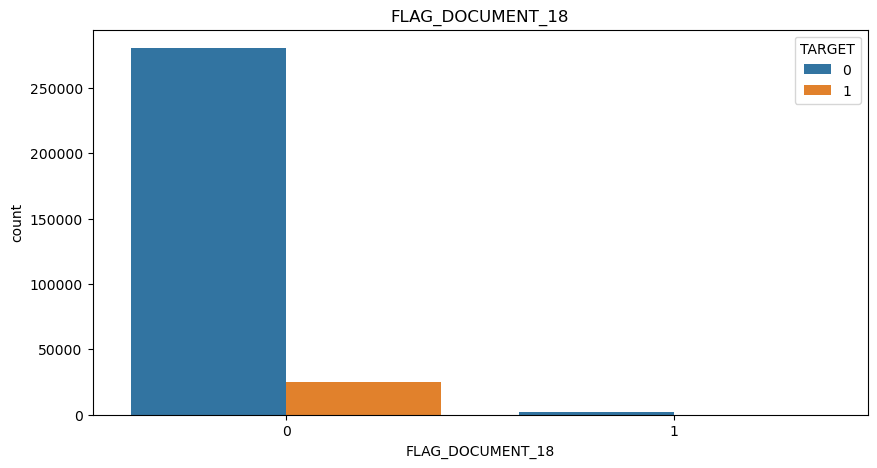

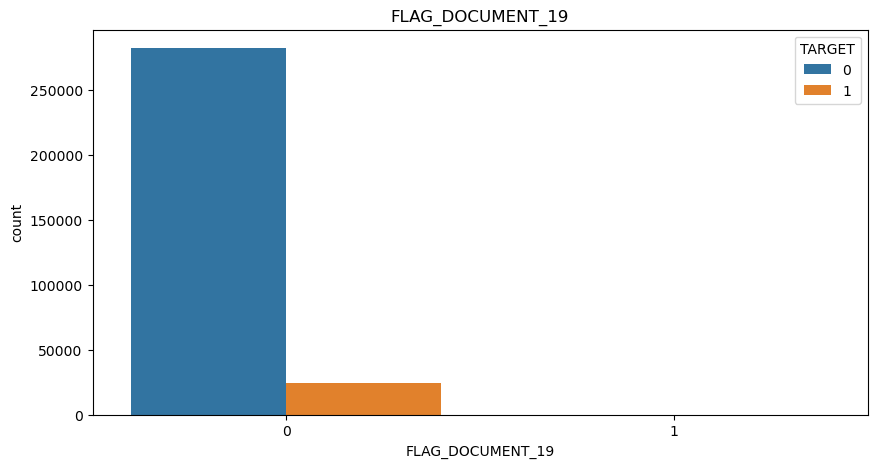

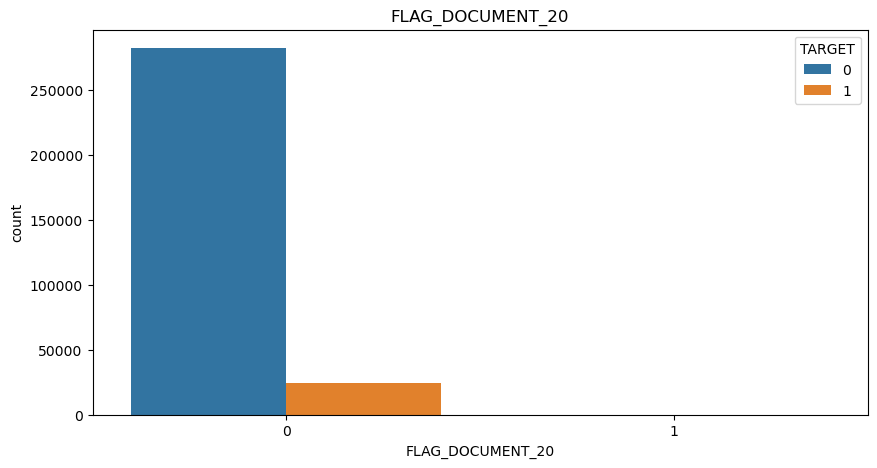

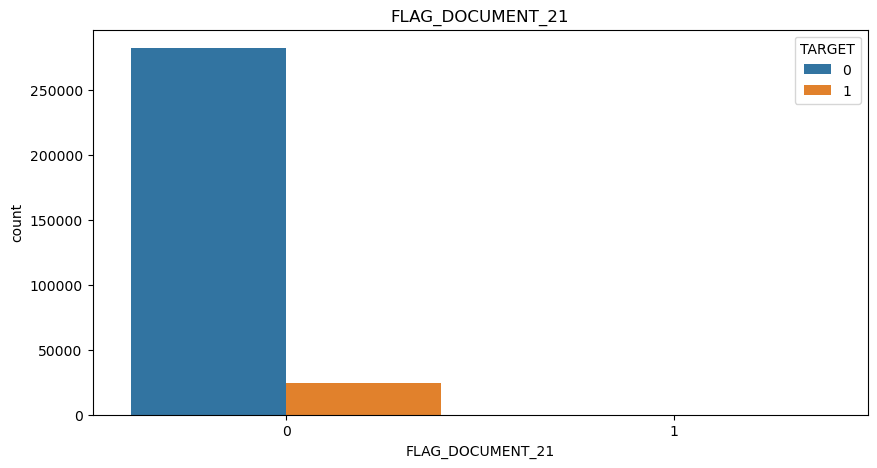

In [106]:
for i in list_docs:    
    plt.subplots(figsize=(10, 5))
    plt.xticks(rotation = 'horizontal')
    plt.title(f'{i}')
    sns.countplot(x=i, hue= 'TARGET', data = data)

<Axes: >

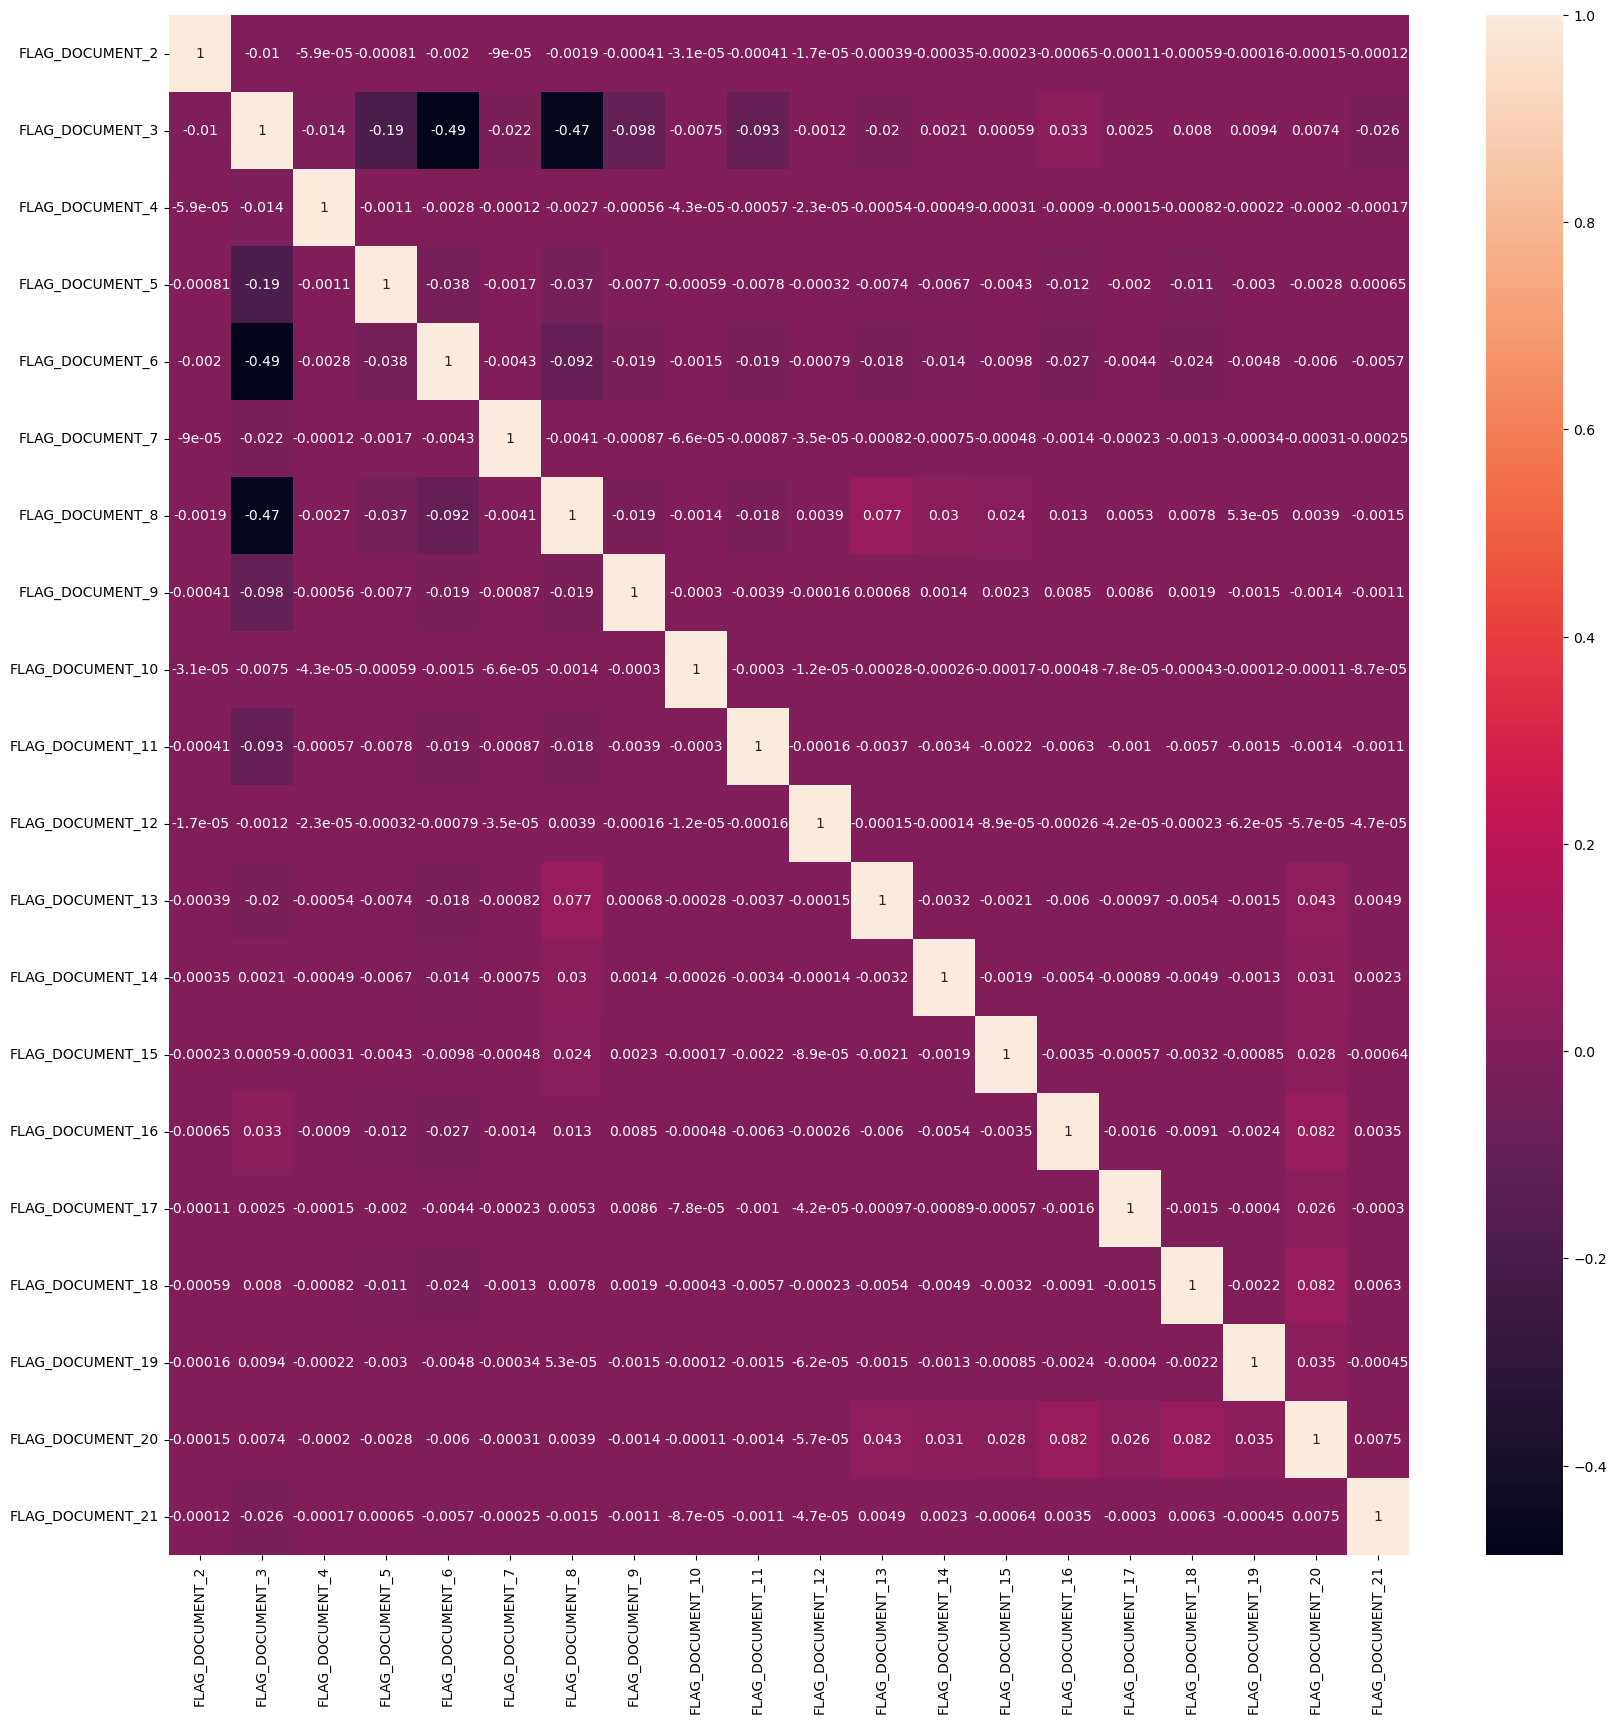

In [14]:
corr = data[list_docs].corr()
fig1, ax1 = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            ax = ax1,annot=True)

In [15]:
data['docs'] = data['FLAG_DOCUMENT_2']+data['FLAG_DOCUMENT_3']+data['FLAG_DOCUMENT_4'] + data['FLAG_DOCUMENT_5'] + data['FLAG_DOCUMENT_6'] + data['FLAG_DOCUMENT_7'] + data['FLAG_DOCUMENT_8'] + data['FLAG_DOCUMENT_9'] + data['FLAG_DOCUMENT_10'] + data['FLAG_DOCUMENT_11'] + data['FLAG_DOCUMENT_12'] + data['FLAG_DOCUMENT_13'] + data['FLAG_DOCUMENT_14'] + data['FLAG_DOCUMENT_15'] + data['FLAG_DOCUMENT_16'] + data['FLAG_DOCUMENT_17'] + data['FLAG_DOCUMENT_18'] + data['FLAG_DOCUMENT_19'] +data['FLAG_DOCUMENT_20'] + data['FLAG_DOCUMENT_21']

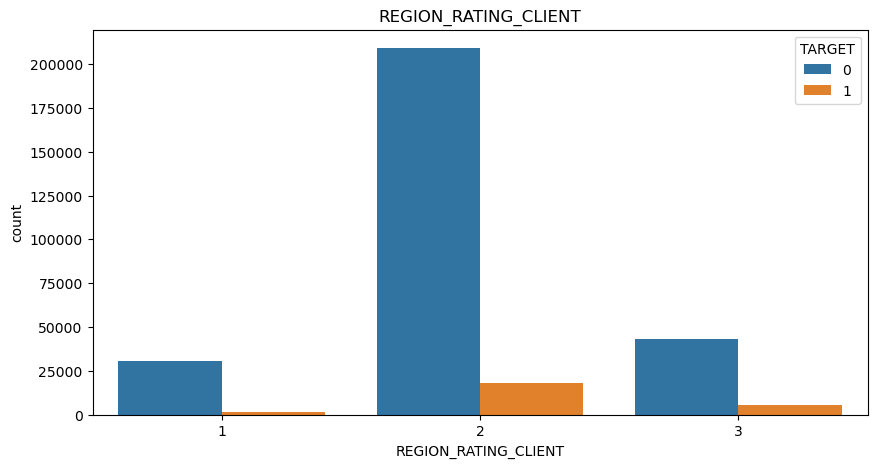

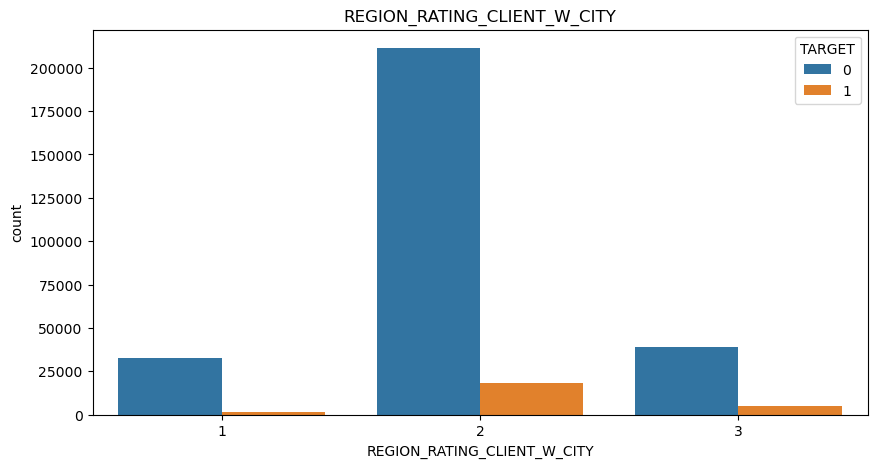

In [16]:
for i in list_rate:    
    plt.subplots(figsize=(10, 5))
    plt.xticks(rotation = 'horizontal')
    plt.title(f'{i}')
    sns.countplot(x=i, hue= 'TARGET', data = data)

<Axes: >

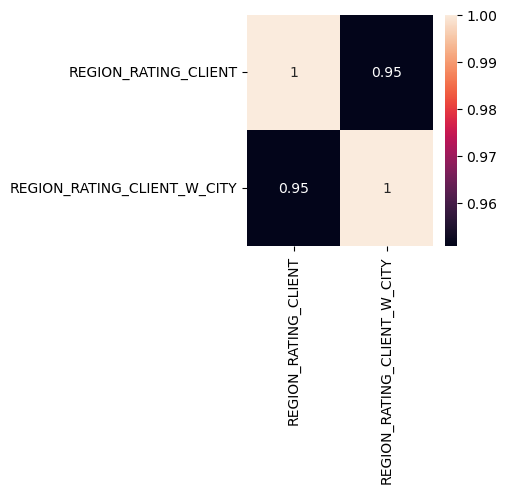

In [198]:
corr = data[list_rate].corr()
fig1, ax1 = plt.subplots(figsize=(3, 3))
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            ax = ax1,annot=True)

<Axes: title={'center': 'HOUR_APPR_PROCESS_START'}, xlabel='HOUR_APPR_PROCESS_START', ylabel='count'>

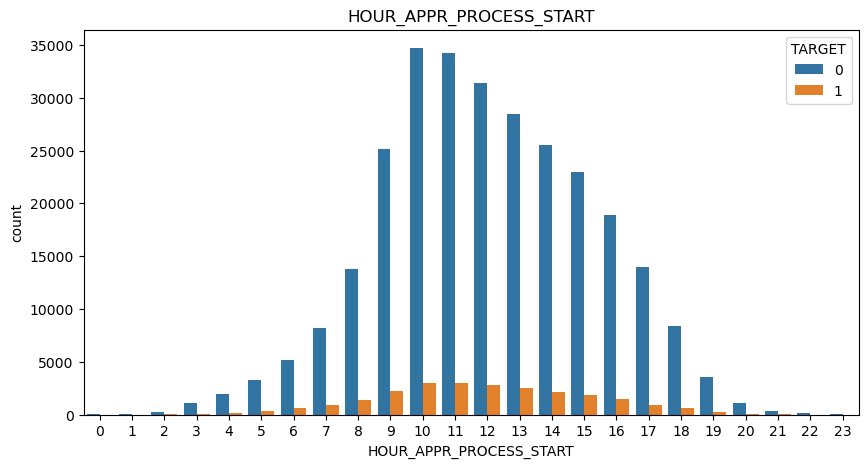

In [17]:
plt.subplots(figsize=(10, 5))
plt.xticks(rotation = 'horizontal')
plt.title('HOUR_APPR_PROCESS_START')
sns.countplot(x='HOUR_APPR_PROCESS_START', hue= 'TARGET', data = data)

In [18]:
unwanted_int = ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'SK_ID_CURR','REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY', 'REGION_RATING_CLIENT_W_CITY']

In [19]:
unwanted_obj = ['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
df_obj = data.select_dtypes('object')
df_obj = df_obj.drop(unwanted_obj, axis = 1)
df_obj.describe().T

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,307511,19,No Value,96391


In [20]:
df_int = data.select_dtypes('int')
df_int = df_int.drop(unwanted_int, axis = 1)
df_int.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-25229.0,-19682.0,-15750.0,-12413.0,-7489.0
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-17912.0,-2760.0,-1213.0,-289.0,365243.0
DAYS_ID_PUBLISH,307511.0,-2994.202373,1509.450419,-7197.0,-4299.0,-3254.0,-1720.0,0.0
FLAG_MOBIL,307511.0,0.999997,0.001803,0.0,1.0,1.0,1.0,1.0
FLAG_EMP_PHONE,307511.0,0.819889,0.384280,0.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,307511.0,0.199368,0.399526,0.0,0.0,0.0,0.0,1.0
FLAG_CONT_MOBILE,307511.0,0.998133,0.043164,0.0,1.0,1.0,1.0,1.0
FLAG_PHONE,307511.0,0.281066,0.449521,0.0,0.0,0.0,1.0,1.0


In [21]:
unwanted_float=['AMT_GOODS_PRICE', 
        'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE',  'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE']
df_float = data.select_dtypes('float')
df_float = df_float.drop(unwanted_float, axis = 1)
df_float.describe().T

,count,mean,std,min,25%,50%,75%,max
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_REGISTRATION,307511.0,-4986.120328,3522.886321,-2.467200e+04,-7479.500000,-4504.000000,-2010.000000,0.000000e+00
EXT_SOURCE_2,306851.0,0.514393,0.191060,8.173617e-08,0.392457,0.565961,0.663617,8.549997e-01
EXT_SOURCE_3,246546.0,0.510853,0.194844,5.272652e-04,0.370650,0.535276,0.669057,8.960095e-01
COMMONAREA_AVG,92646.0,0.044621,0.076036,0.000000e+00,0.007800,0.021100,0.051500,1.000000e+00
OBS_30_CNT_SOCIAL_CIRCLE,306490.0,1.422245,2.400989,0.000000e+00,0.000000,0.000000,2.000000,3.480000e+02
DEF_30_CNT_SOCIAL_CIRCLE,306490.0,0.143421,0.446698,0.000000e+00,0.000000,0.000000,0.000000,3.400000e+01


In [22]:
df_new = pd.concat([df_obj, df_int, df_float], axis = 1)

In [23]:
df_new.columns
data=df_new
data.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'TARGET',
       'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'docs', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'COMMONAREA_AVG',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['NAME_CONTRACT_TYPE'] = le.fit_transform(data['NAME_CONTRACT_TYPE'])
data['CODE_GENDER'] = le.fit_transform(data['CODE_GENDER'])
data['FLAG_OWN_CAR'] = le.fit_transform(data['FLAG_OWN_CAR'])
data['FLAG_OWN_REALTY'] = le.fit_transform(data['FLAG_OWN_REALTY'])
data['NAME_TYPE_SUITE'] = le.fit_transform(data['NAME_TYPE_SUITE'].astype(str))
data['NAME_INCOME_TYPE'] = le.fit_transform(data['NAME_INCOME_TYPE'])
data['NAME_EDUCATION_TYPE'] = le.fit_transform(data['NAME_EDUCATION_TYPE'])
data['NAME_FAMILY_STATUS'] = le.fit_transform(data['NAME_FAMILY_STATUS'])
data['NAME_HOUSING_TYPE'] = le.fit_transform(data['NAME_HOUSING_TYPE'])
data['OCCUPATION_TYPE'] = le.fit_transform(data['OCCUPATION_TYPE'].astype(str))
data['WEEKDAY_APPR_PROCESS_START'] = le.fit_transform(data['WEEKDAY_APPR_PROCESS_START'])
data['ORGANIZATION_TYPE'] = le.fit_transform(data['ORGANIZATION_TYPE'])

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn.metrics as metrics
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score, fbeta_score, roc_auc_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_curve, auc
import math

In [26]:
from sklearn.svm import LinearSVC, SVC

In [27]:

data.info()
data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   NAME_CONTRACT_TYPE           307511 non-null  int32  
 1   CODE_GENDER                  307511 non-null  int32  
 2   FLAG_OWN_CAR                 307511 non-null  int32  
 3   FLAG_OWN_REALTY              307511 non-null  int32  
 4   NAME_TYPE_SUITE              307511 non-null  int32  
 5   NAME_INCOME_TYPE             307511 non-null  int32  
 6   NAME_EDUCATION_TYPE          307511 non-null  int32  
 7   NAME_FAMILY_STATUS           307511 non-null  int32  
 8   NAME_HOUSING_TYPE            307511 non-null  int32  
 9   OCCUPATION_TYPE              307511 non-null  int32  
 10  WEEKDAY_APPR_PROCESS_START   307511 non-null  int32  
 11  ORGANIZATION_TYPE            307511 non-null  int32  
 12  TARGET                       307511 non-null  int64  
 13 

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,...,COMMONAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,1,0,1,6,7,4,3,1,8,...,0.0143,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,0,1,4,1,1,1,3,...,0.0605,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,1,1,6,7,4,3,1,8,...,NaN,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,1,6,7,4,0,1,8,...,NaN,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1,0,1,6,7,4,3,1,3,...,NaN,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,1,0,0,6,7,4,2,5,15,...,0.0202,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,0,0,0,1,6,3,4,5,1,12,...,0.0022,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,0,0,0,1,6,7,1,2,1,10,...,0.0123,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,0,0,0,1,6,1,4,1,1,8,...,NaN,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:

X = data.drop(['TARGET'],axis = 1)
y = data['TARGET']
X['COMMONAREA_AVG'] = X['COMMONAREA_AVG'].fillna(data['COMMONAREA_AVG'].mean())
X['AMT_REQ_CREDIT_BUREAU_HOUR'] = X['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(data['AMT_REQ_CREDIT_BUREAU_HOUR'].median())
X['AMT_REQ_CREDIT_BUREAU_DAY'] = X['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(data['AMT_REQ_CREDIT_BUREAU_DAY'].median())
X['AMT_REQ_CREDIT_BUREAU_WEEK'] = X['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(data['AMT_REQ_CREDIT_BUREAU_WEEK'].median())
X['AMT_REQ_CREDIT_BUREAU_MON'] = X['AMT_REQ_CREDIT_BUREAU_MON'].fillna(data['AMT_REQ_CREDIT_BUREAU_MON'].median())
X['AMT_REQ_CREDIT_BUREAU_QRT'] = X['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(data['AMT_REQ_CREDIT_BUREAU_QRT'].median())
X['AMT_REQ_CREDIT_BUREAU_YEAR'] = X['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(data['AMT_REQ_CREDIT_BUREAU_YEAR'].median())
X['OBS_30_CNT_SOCIAL_CIRCLE'] = X['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(data['OBS_30_CNT_SOCIAL_CIRCLE'].median())
X['DEF_30_CNT_SOCIAL_CIRCLE'] = X['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(data['DEF_30_CNT_SOCIAL_CIRCLE'].median())
X['DAYS_LAST_PHONE_CHANGE'] = X['DAYS_LAST_PHONE_CHANGE'].fillna(data['DAYS_LAST_PHONE_CHANGE'].mean())
X['EXT_SOURCE_2'] = X['EXT_SOURCE_2'].fillna(data['EXT_SOURCE_2'].mean())
X['EXT_SOURCE_3'] = X['EXT_SOURCE_3'].fillna(data['EXT_SOURCE_3'].mean())
X['AMT_ANNUITY'] = X['AMT_ANNUITY'].fillna(data['AMT_ANNUITY'].mean())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 2020)

    
scaler = RobustScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
def model_Evaluate(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 2020)
    scaler = RobustScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    # accuracy of model on training data
    acc_train = model.score(X_train_scaled, y_train)
    # accuracy of model on test data
    acc_test = model.score(X_test_scaled, y_test)
    
    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

    # Predict values for Test dataset
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[::,1]
    
    # y_score
    try:
        y_score = model.fit(X_train_scaled, y_train).decision_function(X_test_scaled)
    except:
        pass
    
    try:
        clf = model.fit(X_train_scaled, y_train)
        y_score = clf.predict_proba(X_test_scaled)
    except:
        pass
    
    # precision of model on test data
    pre_test = precision_score(y_test, y_pred)
    
    # recall of model on test data
    rec_test = recall_score(y_test, y_pred)
    
    # f1 of model on test data
    f1_test = f1_score(y_test, y_pred)
    
    # f2 of model on test data
    f2_test = fbeta_score(y_test, y_pred, beta=2, average='macro')
    
    # AUC of model on test data
    auc_test = roc_auc_score(y_test, y_pred_proba)
    
    # Mattews_corrcoef
    mcc = matthews_corrcoef(y_pred, y_test)
    
    
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    print(f'f2 score: {f2_test}')
    print(f'matthews_corrcoef: {mcc}')
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    
    d = {'Train_Accuracy': [acc_train], 'Test_Accuracy': [acc_test], 
         'Precision': [pre_test], 'Recall': [rec_test],
         'AUC': [auc_test], 'F1_Score': [f1_test], 'F2_Score': [f2_test], 
         'Roc_Auc_score': auc_test, 'Matthews_corrcoef' : mcc}
    
    df = pd.DataFrame(data=d)
    # summarize feature importance
    print(type(model).__name__)
    modelName = type(model).__name__

    # roc curve
    try:
        fpr = dict()
        tpr = dict()
        roc_auc = dict()

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])
        plt.figure()
        lw = 2
        plt.plot(fpr["micro"], tpr["micro"], color='darkorange',
                 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc="lower right")
        plt.show()
    except:
        pass
    return df



        NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
307510                   0            0             0                0   

        NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
307510                6                 1                    1   

        NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  OCCUPATION_TYPE  ...  \
307510                   1                  1                8  ...   

        COMMONAREA_AVG  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
307510          0.0176                       0.0                       0.0   

        DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
307510                  -787.0                         0.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
307510                        0.0                         0.0   

        AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
307510                        2.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_YEA

Accuracy of model on training data : 91.91756830207612
Accuracy of model on testing data : 91.95482038719189 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84833
           1       0.49      0.00      0.00      7421

    accuracy                           0.92     92254
   macro avg       0.70      0.50      0.48     92254
weighted avg       0.88      0.92      0.88     92254

f2 score: 0.49284878454387904
matthews_corrcoef: 0.02990485342772465
CalibratedClassifierCV


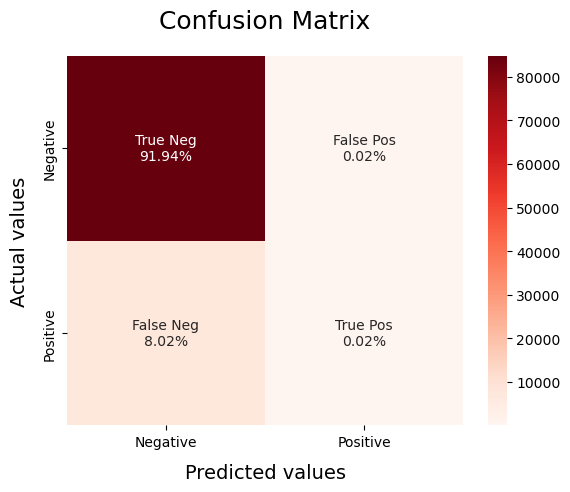

In [35]:

from sklearn.calibration import CalibratedClassifierCV
svm = LinearSVC()
clf = CalibratedClassifierCV(svm) 
clf.fit(X_train_scaled, y_train)
svm_df = model_Evaluate(clf, X, y)

In [40]:
df=pd.read_csv('username.csv')

In [74]:
USERNAME = df["USERNAME"]
PASSWORD = df["PASSWORD"]  

credentials = dict(zip(USERNAME, PASSWORD))


USERNAME = input("Enter username: ")
PASSWORD = input("Enter password: ")

# Check for matching credentials
if USERNAME in credentials and credentials[USERNAME] == PASSWORD:
    list1=[]
    for i in X.columns:
        d=float(input(i))
        list1.append(d)
    arr1=np.array([list1])
    list2=[]
    arr2=np.array([list2])
    arr2=clf.predict(arr1)
    if(arr2[0]==0):
        print('Fraudulent transaction')
    else:
        print('Please continue')
    print(arr2)
        
else:
   print("Invalid Username or Password")

Enter username: ramdin verma
Enter password: yxK7vy%g
NAME_CONTRACT_TYPE1
CODE_GENDER1
FLAG_OWN_CAR1
FLAG_OWN_REALTY1
NAME_TYPE_SUITE1
NAME_INCOME_TYPE3
NAME_EDUCATION_TYPE3
NAME_FAMILY_STATUS1
NAME_HOUSING_TYPE3
OCCUPATION_TYPE11
WEEKDAY_APPR_PROCESS_START5
ORGANIZATION_TYPE11
CNT_CHILDREN0
DAYS_BIRTH-123456
DAYS_EMPLOYED-730
DAYS_ID_PUBLISH-300
FLAG_MOBIL1
FLAG_EMP_PHONE1
FLAG_WORK_PHONE1
FLAG_CONT_MOBILE1
FLAG_PHONE0
FLAG_EMAIL1
REGION_RATING_CLIENT1
HOUR_APPR_PROCESS_START13
REG_REGION_NOT_LIVE_REGION1
LIVE_REGION_NOT_WORK_REGION1
REG_CITY_NOT_LIVE_CITY1
LIVE_CITY_NOT_WORK_CITY0
docs3
AMT_INCOME_TOTAL123456
AMT_CREDIT12345
AMT_ANNUITY1234
REGION_POPULATION_RELATIVE0.01234
DAYS_REGISTRATION-300
EXT_SOURCE_20.234
EXT_SOURCE_30.123
COMMONAREA_AVG0.0345
OBS_30_CNT_SOCIAL_CIRCLE3
DEF_30_CNT_SOCIAL_CIRCLE1
DAYS_LAST_PHONE_CHANGE-34
AMT_REQ_CREDIT_BUREAU_HOUR0
AMT_REQ_CREDIT_BUREAU_DAY0
AMT_REQ_CREDIT_BUREAU_WEEK0
AMT_REQ_CREDIT_BUREAU_MON1
AMT_REQ_CREDIT_BUREAU_QRT3
AMT_REQ_CREDIT_BUREAU